In [1]:
# 导入包
import csv
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# 设置归一化参数epsilon
epsi = 10e-6

In [8]:
# 读取input文件
with open('datasets\input.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    X= [row for row in reader]
# 将str类型转为float    
data = [[float(x) for x in row] for row in X]
# 转为numpy.array类型
X = np.array(data)
# 得到平均值和方差用来归一化输入
mean_X = np.mean(X, axis = 0)
var_X = np.var(X, axis = 0)
print("Mean_X:")
print(mean_X)
print("Variance_X:")
print(var_X)
print('\n')
# 对X归一化
X -= mean_X
X /= np.sqrt(var_X + epsi)

print(X[0])
print(X.shape)

Mean_X:
[2.54028462e+03 2.54920576e+03 2.53092215e+03 2.54065273e+03
 2.54065273e+03 3.47477556e+09]
Variance_X:
[4.74951361e+04 4.82153393e+04 4.67370002e+04 4.73686364e+04
 4.73686364e+04 3.74214803e+17]


[-1.74316579 -1.72878134 -1.71393996 -1.73215852 -1.73215852 -0.91253438]
(502, 6)


In [7]:
# 读取target文件
with open('datasets\output.csv','r', encoding='utf-8-sig') as csvfile:
    reader = csv.reader(csvfile)
    Y= [row for row in reader]
# 将str类型转为float  
data = [[float(x) for x in row] for row in Y]
# 转为numpy.array类型
Y = np.array(data)
# 求得平均值和方差来进行归一化
mean_Y = np.mean(Y, axis = 0)
var_Y = np.var(Y, axis=0)
print("Mean_Y:")
print(mean_Y)
print("Variance_Y:")
print(var_Y)
print('\n')
# 对Y进行归一化
Y -= mean_Y
Y /= np.sqrt(var_Y + epsi)
print(Y[0])
print(Y.shape)

Mean_Y:
[2541.71318341]
Variance_Y:
[47432.16794594]


[-1.74647299]
(502, 1)


In [9]:
# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [10]:
# 构建神经网络
model = Sequential()
model.add(Dense(16, activation='tanh', input_shape = (6,), kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(32, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(32, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(16, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(8, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(1, activation='linear', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                112       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 2,385
Trainable params: 2,385
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 编译网络并进行训练
model.compile(loss = keras.losses.mean_squared_error,
            optimizer = keras.optimizers.Adadelta(),
            metrics = ["accuracy"])
hist = model.fit(X_train, y_train,
            batch_size = 128,
            epochs = 500,
            verbose = 1,
            validation_data = (X_test, y_test))
# 测试网络
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Train on 351 samples, validate on 151 samples
Epoch 1/500
351/351 [==============================] - 0s 1ms/step - loss: 0.9327 - acc: 0.0000e+00 - val_loss: 1.1567 - val_acc: 0.0000e+00
Epoch 2/500
351/351 [==============================] - 0s 24us/step - loss: 0.9329 - acc: 0.0000e+00 - val_loss: 1.1567 - val_acc: 0.0000e+00
Epoch 3/500
351/351 [==============================] - 0s 17us/step - loss: 0.9327 - acc: 0.0000e+00 - val_loss: 1.1568 - val_acc: 0.0000e+00
Epoch 4/500
351/351 [==============================] - 0s 20us/step - loss: 0.9326 - acc: 0.0000e+00 - val_loss: 1.1570 - val_acc: 0.0000e+00
Epoch 5/500
351/351 [==============================] - 0s 31us/step - loss: 0.9325 - acc: 0.0000e+00 - val_loss: 1.1572 - val_acc: 0.0000e+00
Epoch 6/500
351/351 [==============================] - 0s 23us/step - loss: 0.9326 - acc: 0.0000e+00 - val_loss: 1.1574 - val_acc: 0.0000e+00
Epoch 7/500
351/351 [==============================] - 0s 40us/step - loss: 0.9324 - acc: 0.0000e+00 - 

351/351 [==============================] - 0s 23us/step - loss: 0.9315 - acc: 0.0000e+00 - val_loss: 1.1611 - val_acc: 0.0000e+00
Epoch 59/500
351/351 [==============================] - 0s 14us/step - loss: 0.9311 - acc: 0.0000e+00 - val_loss: 1.1609 - val_acc: 0.0000e+00
Epoch 60/500
351/351 [==============================] - 0s 14us/step - loss: 0.9310 - acc: 0.0000e+00 - val_loss: 1.1605 - val_acc: 0.0000e+00
Epoch 61/500
351/351 [==============================] - 0s 14us/step - loss: 0.9310 - acc: 0.0000e+00 - val_loss: 1.1599 - val_acc: 0.0000e+00
Epoch 62/500
351/351 [==============================] - 0s 20us/step - loss: 0.9304 - acc: 0.0000e+00 - val_loss: 1.1592 - val_acc: 0.0000e+00
Epoch 63/500
351/351 [==============================] - 0s 20us/step - loss: 0.9296 - acc: 0.0000e+00 - val_loss: 1.1581 - val_acc: 0.0000e+00
Epoch 64/500
351/351 [==============================] - 0s 14us/step - loss: 0.9302 - acc: 0.0000e+00 - val_loss: 1.1554 - val_acc: 0.0000e+00
Epoch 65/500

Epoch 172/500
351/351 [==============================] - 0s 20us/step - loss: 0.0319 - acc: 0.0000e+00 - val_loss: 0.0554 - val_acc: 0.0000e+00
Epoch 173/500
351/351 [==============================] - 0s 23us/step - loss: 0.0342 - acc: 0.0000e+00 - val_loss: 0.0332 - val_acc: 0.0000e+00
Epoch 174/500
351/351 [==============================] - 0s 26us/step - loss: 0.0424 - acc: 0.0000e+00 - val_loss: 0.0700 - val_acc: 0.0000e+00
Epoch 175/500
351/351 [==============================] - 0s 26us/step - loss: 0.0391 - acc: 0.0000e+00 - val_loss: 0.0379 - val_acc: 0.0000e+00
Epoch 176/500
351/351 [==============================] - 0s 20us/step - loss: 0.0356 - acc: 0.0000e+00 - val_loss: 0.0714 - val_acc: 0.0000e+00
Epoch 177/500
351/351 [==============================] - 0s 26us/step - loss: 0.0411 - acc: 0.0000e+00 - val_loss: 0.0245 - val_acc: 0.0000e+00
Epoch 178/500
351/351 [==============================] - 0s 23us/step - loss: 0.0274 - acc: 0.0000e+00 - val_loss: 0.0538 - val_acc: 0.0

Epoch 229/500
351/351 [==============================] - 0s 17us/step - loss: 0.0498 - acc: 0.0000e+00 - val_loss: 0.0324 - val_acc: 0.0000e+00
Epoch 230/500
351/351 [==============================] - 0s 17us/step - loss: 0.0320 - acc: 0.0000e+00 - val_loss: 0.0427 - val_acc: 0.0000e+00
Epoch 231/500
351/351 [==============================] - 0s 23us/step - loss: 0.0225 - acc: 0.0000e+00 - val_loss: 0.0203 - val_acc: 0.0000e+00
Epoch 232/500
351/351 [==============================] - 0s 17us/step - loss: 0.0289 - acc: 0.0000e+00 - val_loss: 0.0655 - val_acc: 0.0000e+00
Epoch 233/500
351/351 [==============================] - 0s 20us/step - loss: 0.0449 - acc: 0.0000e+00 - val_loss: 0.0394 - val_acc: 0.0000e+00
Epoch 234/500
351/351 [==============================] - 0s 14us/step - loss: 0.0412 - acc: 0.0000e+00 - val_loss: 0.0721 - val_acc: 0.0000e+00
Epoch 235/500
351/351 [==============================] - 0s 26us/step - loss: 0.0417 - acc: 0.0000e+00 - val_loss: 0.0307 - val_acc: 0.0

Epoch 286/500
351/351 [==============================] - 0s 17us/step - loss: 0.0275 - acc: 0.0000e+00 - val_loss: 0.0362 - val_acc: 0.0000e+00
Epoch 287/500
351/351 [==============================] - 0s 23us/step - loss: 0.0182 - acc: 0.0000e+00 - val_loss: 0.0236 - val_acc: 0.0000e+00
Epoch 288/500
351/351 [==============================] - 0s 20us/step - loss: 0.0272 - acc: 0.0000e+00 - val_loss: 0.0491 - val_acc: 0.0000e+00
Epoch 289/500
351/351 [==============================] - 0s 26us/step - loss: 0.0357 - acc: 0.0000e+00 - val_loss: 0.0268 - val_acc: 0.0000e+00
Epoch 290/500
351/351 [==============================] - 0s 17us/step - loss: 0.0307 - acc: 0.0000e+00 - val_loss: 0.0499 - val_acc: 0.0000e+00
Epoch 291/500
351/351 [==============================] - 0s 23us/step - loss: 0.0294 - acc: 0.0000e+00 - val_loss: 0.0197 - val_acc: 0.0000e+00
Epoch 292/500
351/351 [==============================] - 0s 23us/step - loss: 0.0183 - acc: 0.0000e+00 - val_loss: 0.0315 - val_acc: 0.0

Epoch 343/500
351/351 [==============================] - 0s 26us/step - loss: 0.0427 - acc: 0.0000e+00 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 344/500
351/351 [==============================] - 0s 17us/step - loss: 0.0131 - acc: 0.0000e+00 - val_loss: 0.0235 - val_acc: 0.0000e+00
Epoch 345/500
351/351 [==============================] - 0s 23us/step - loss: 0.0125 - acc: 0.0000e+00 - val_loss: 0.0194 - val_acc: 0.0000e+00
Epoch 346/500
351/351 [==============================] - 0s 14us/step - loss: 0.0273 - acc: 0.0000e+00 - val_loss: 0.0549 - val_acc: 0.0000e+00
Epoch 347/500
351/351 [==============================] - 0s 26us/step - loss: 0.0483 - acc: 0.0000e+00 - val_loss: 0.0379 - val_acc: 0.0000e+00
Epoch 348/500
351/351 [==============================] - 0s 26us/step - loss: 0.0289 - acc: 0.0000e+00 - val_loss: 0.0477 - val_acc: 0.0000e+00
Epoch 349/500
351/351 [==============================] - 0s 20us/step - loss: 0.0240 - acc: 0.0000e+00 - val_loss: 0.0242 - val_acc: 0.0

Epoch 400/500
351/351 [==============================] - 0s 20us/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 401/500
351/351 [==============================] - 0s 20us/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.0134 - val_acc: 0.0000e+00
Epoch 402/500
351/351 [==============================] - 0s 20us/step - loss: 0.0080 - acc: 0.0000e+00 - val_loss: 0.0117 - val_acc: 0.0000e+00
Epoch 403/500
351/351 [==============================] - 0s 26us/step - loss: 0.0065 - acc: 0.0000e+00 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 404/500
351/351 [==============================] - 0s 31us/step - loss: 0.0067 - acc: 0.0000e+00 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 405/500
351/351 [==============================] - 0s 23us/step - loss: 0.0074 - acc: 0.0000e+00 - val_loss: 0.0124 - val_acc: 0.0000e+00
Epoch 406/500
351/351 [==============================] - 0s 26us/step - loss: 0.0163 - acc: 0.0000e+00 - val_loss: 0.0359 - val_acc: 0.0

Epoch 457/500
351/351 [==============================] - 0s 23us/step - loss: 0.0099 - acc: 0.0000e+00 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 458/500
351/351 [==============================] - 0s 23us/step - loss: 0.0129 - acc: 0.0000e+00 - val_loss: 0.0268 - val_acc: 0.0000e+00
Epoch 459/500
351/351 [==============================] - 0s 26us/step - loss: 0.0242 - acc: 0.0000e+00 - val_loss: 0.0189 - val_acc: 0.0000e+00
Epoch 460/500
351/351 [==============================] - 0s 26us/step - loss: 0.0192 - acc: 0.0000e+00 - val_loss: 0.0203 - val_acc: 0.0000e+00
Epoch 461/500
351/351 [==============================] - 0s 20us/step - loss: 0.0127 - acc: 0.0000e+00 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 462/500
351/351 [==============================] - 0s 26us/step - loss: 0.0111 - acc: 0.0000e+00 - val_loss: 0.0187 - val_acc: 0.0000e+00
Epoch 463/500
351/351 [==============================] - 0s 23us/step - loss: 0.0102 - acc: 0.0000e+00 - val_loss: 0.0122 - val_acc: 0.0

In [12]:
# 进行预测
y_test_predict = model.predict(X[::2])
# print(X[::2])

In [13]:
# print(Y[::2])

In [16]:
# print(y_test_predict)
# print(y_test_predict.shape)

In [14]:
# Y真实值
y_true_test = Y[::2] * np.sqrt(var_Y + epsi) + mean_Y 
# print(y_true_test)

In [15]:
# Y预测值
y_true_test_predict = y_test_predict * np.sqrt(var_Y + epsi) + mean_Y
# print(y_true_test_predict)

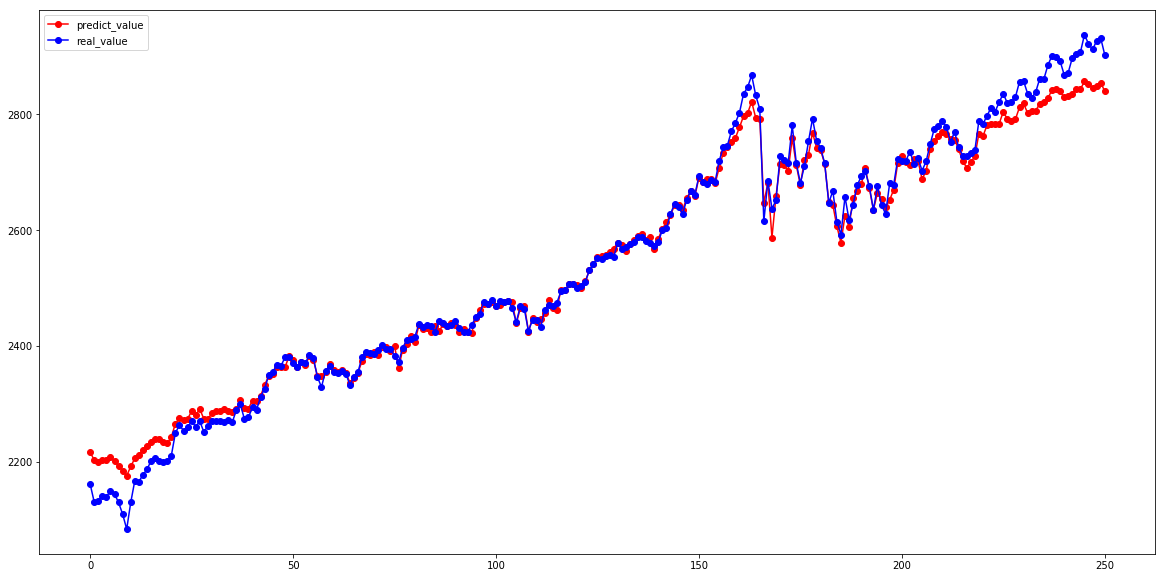

In [17]:
# 画图比较真实值和预测值
x_coor_len = len(y_true_test_predict)
x_coor_len
x_coor = range(x_coor_len)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.plot(x_coor, y_true_test_predict, 'ro-', label='predict_value')
plt.plot(x_coor, y_true_test, 'bo-', label = 'real_value')
plt.legend()